In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy import stats 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data = data.rename(columns={"Bankrupt?": "Bankrupt"})

In [4]:
data = data.drop(data.columns[[94]], axis=1)
data.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.127236,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.2075

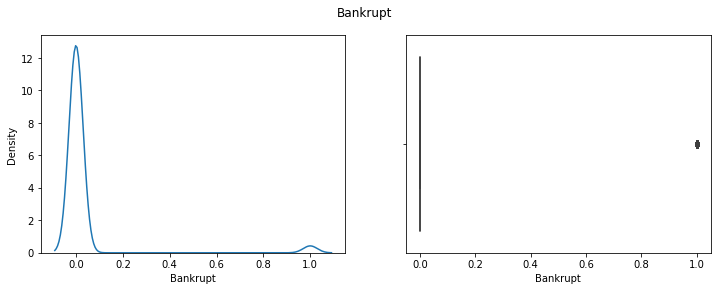

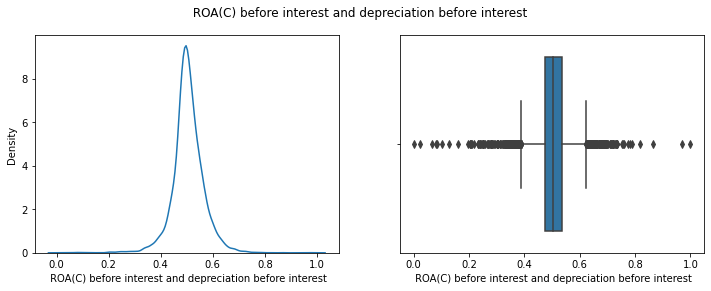

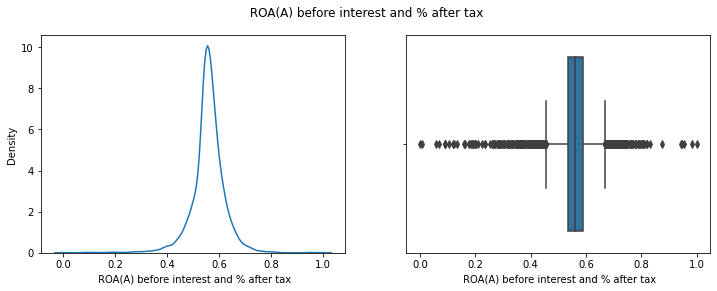

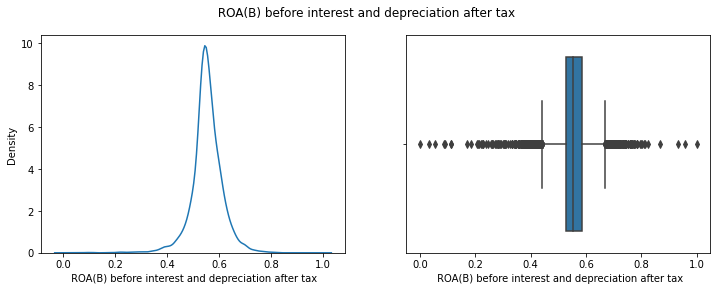

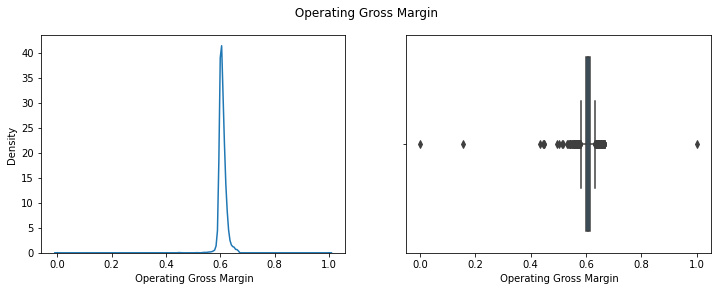

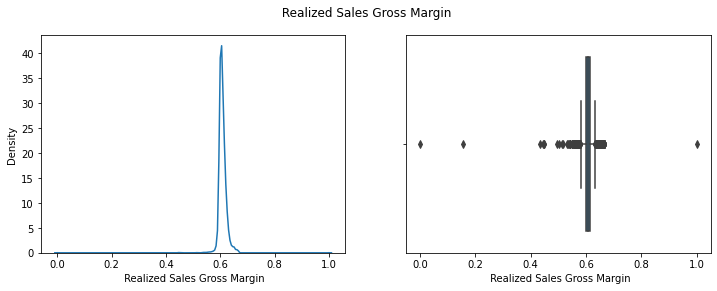

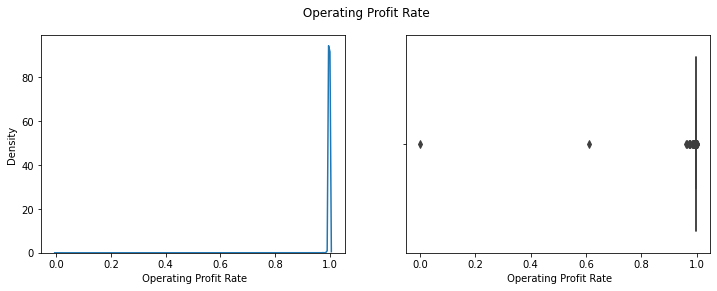

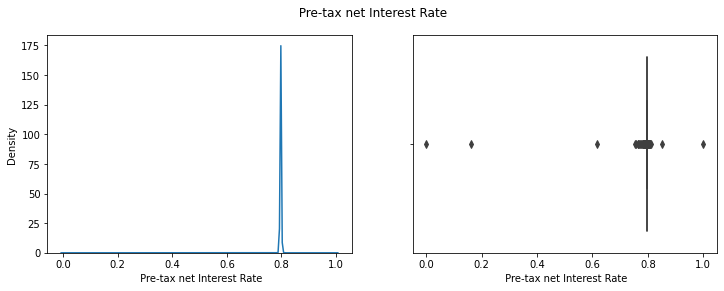

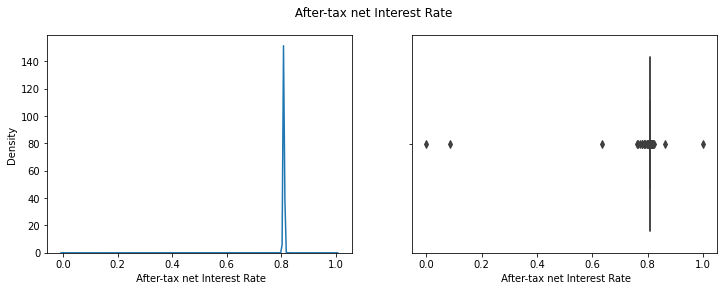

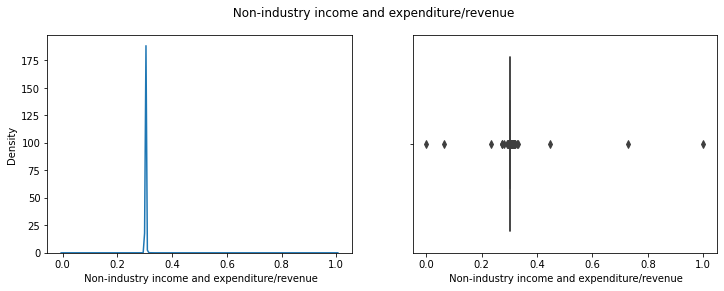

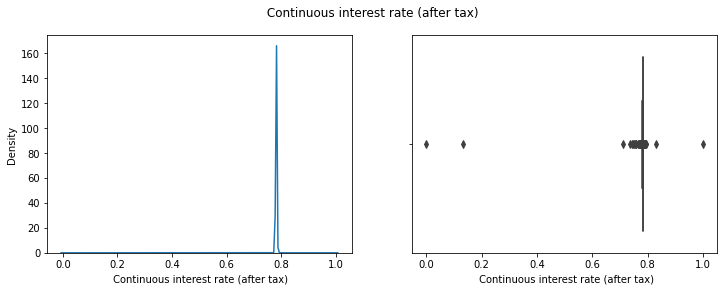

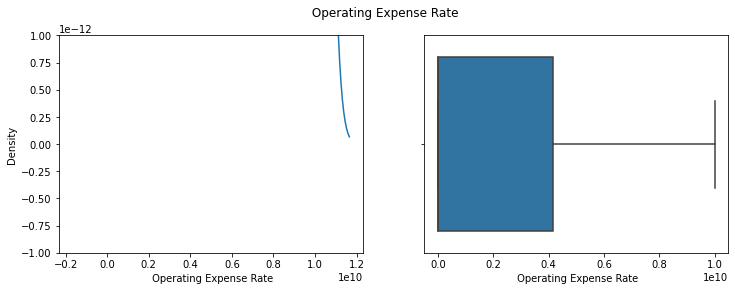

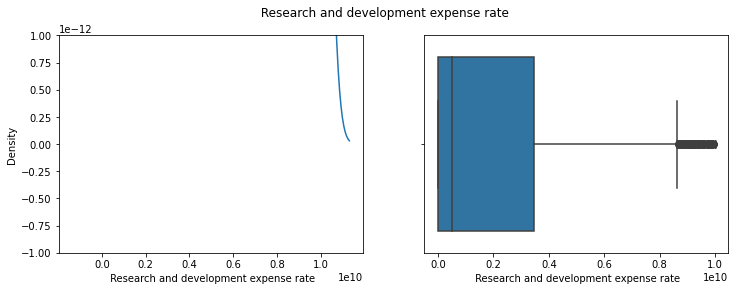

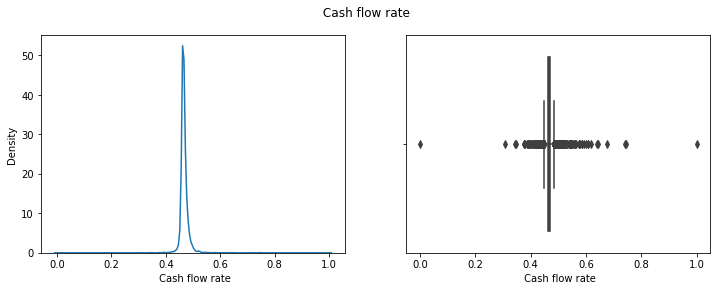

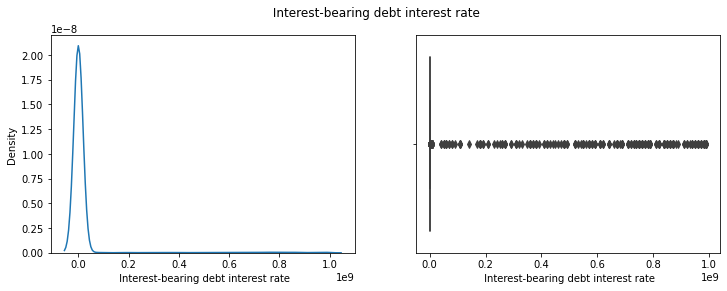

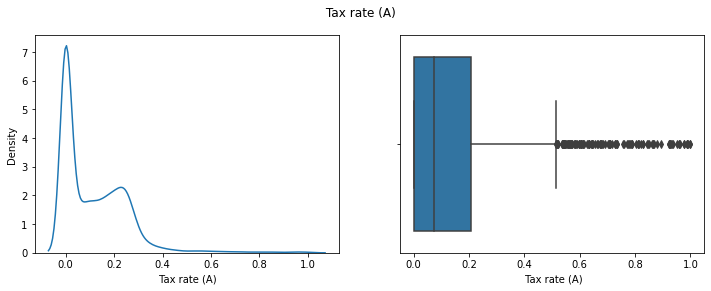

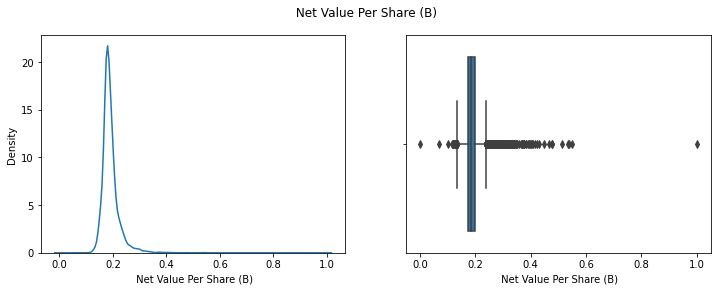

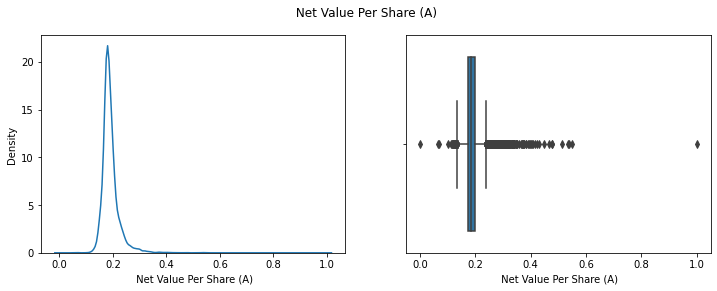

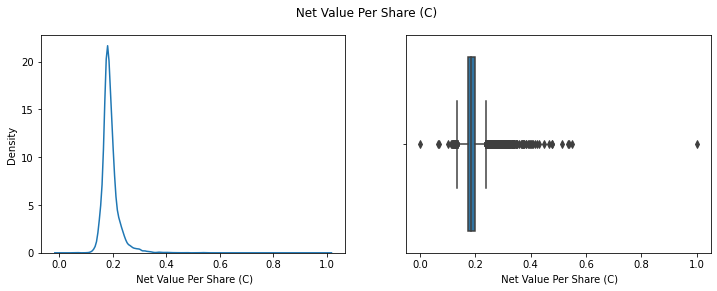

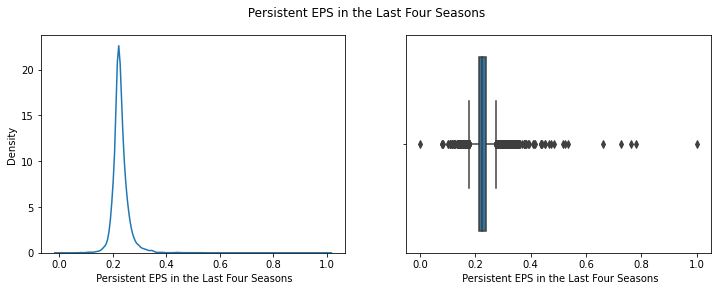

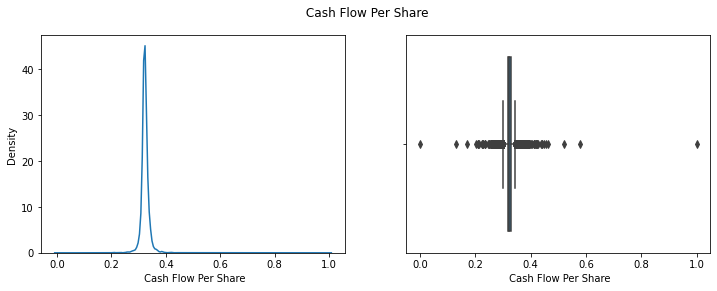

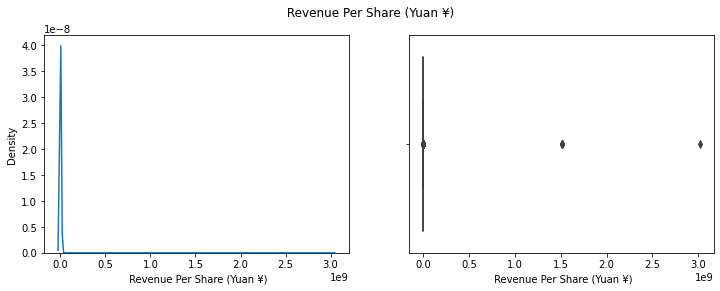

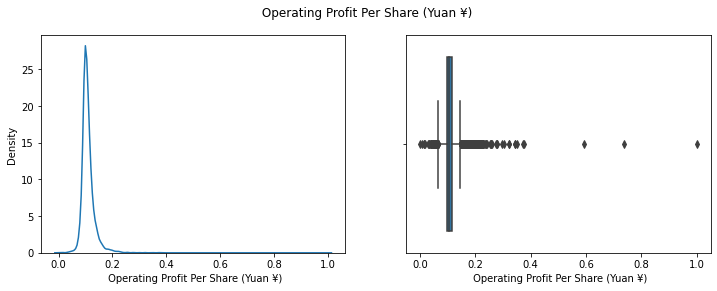

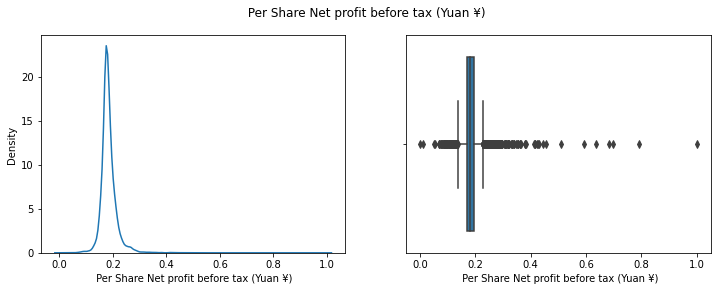

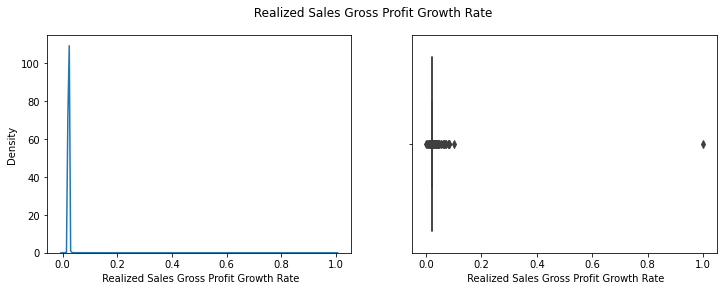

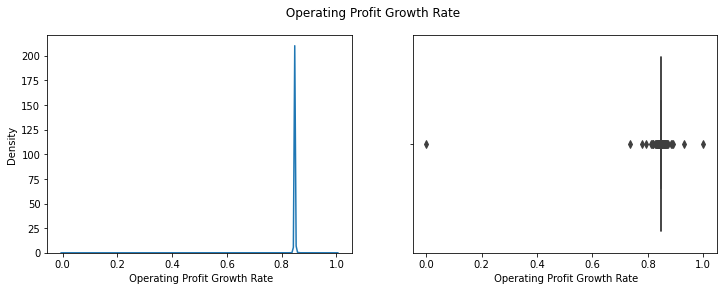

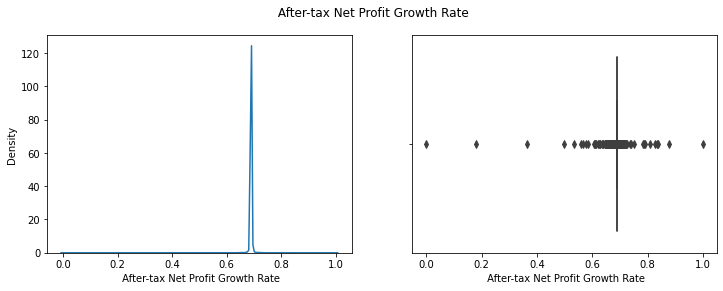

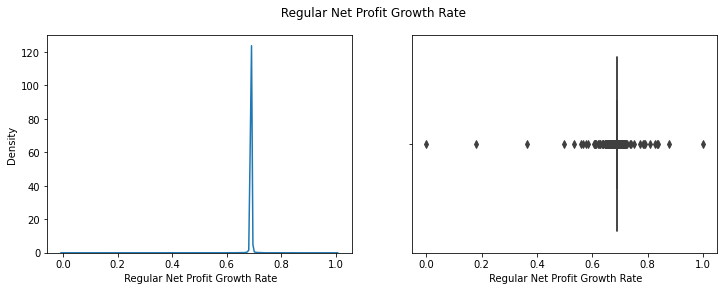

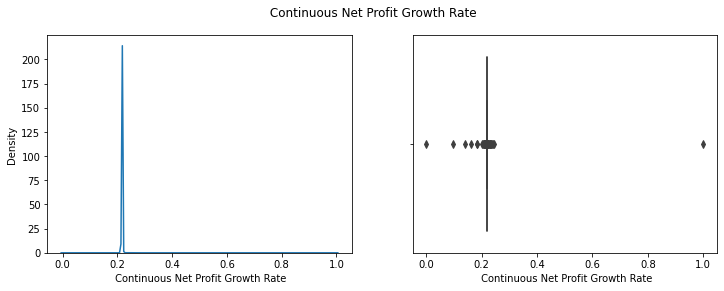

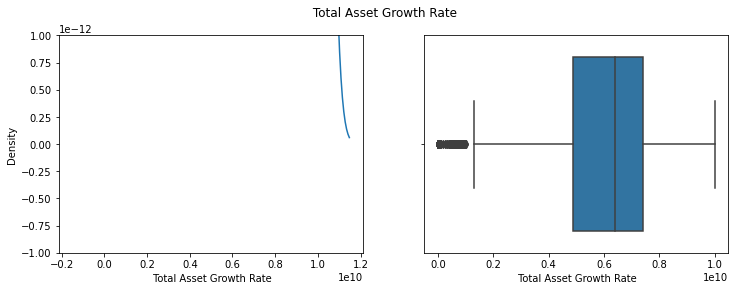

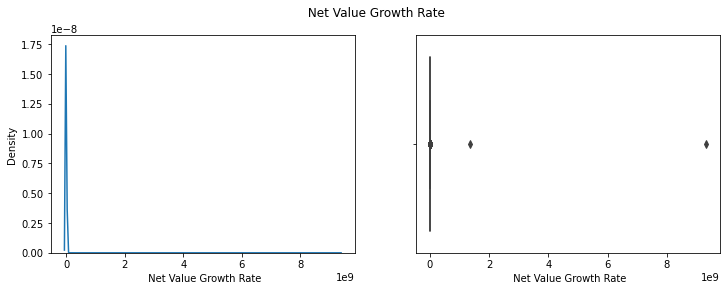

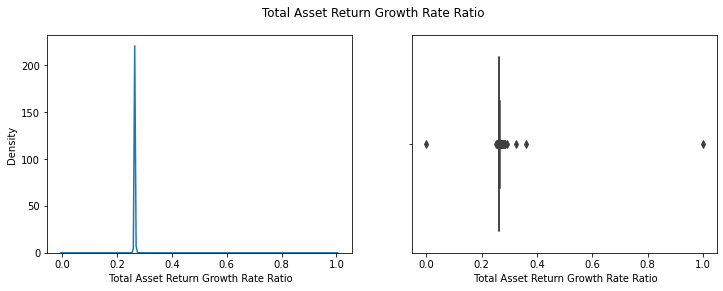

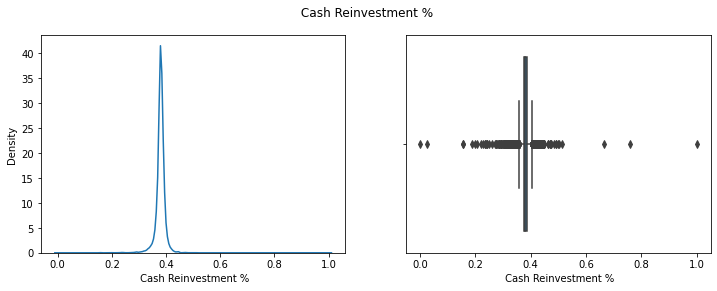

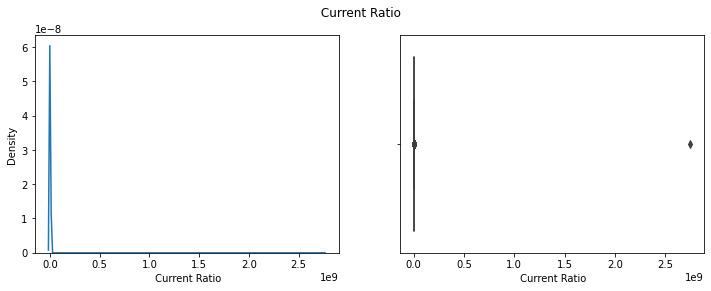

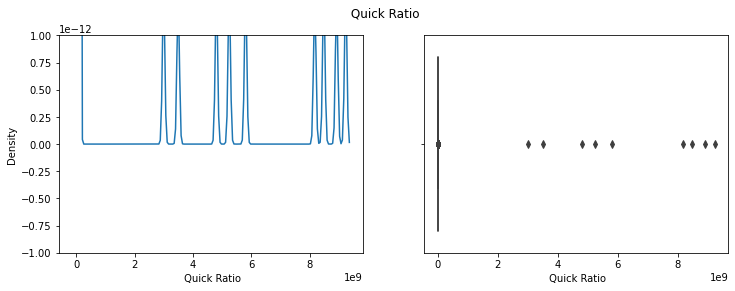

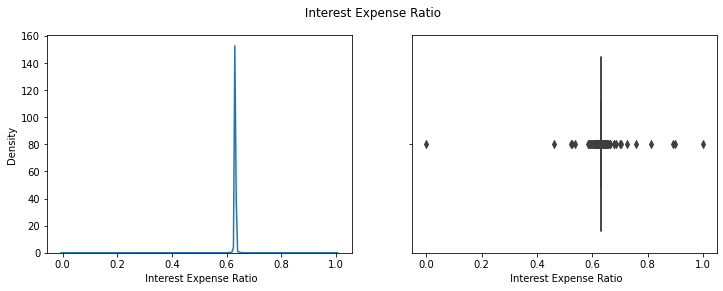

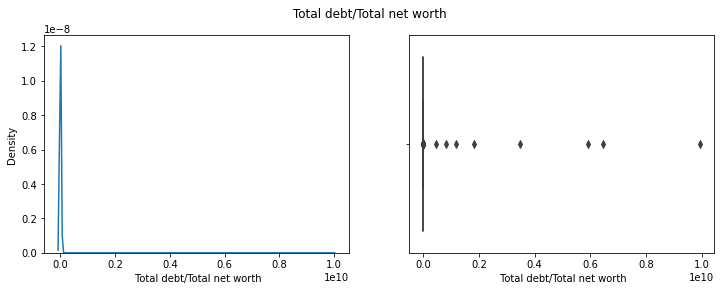

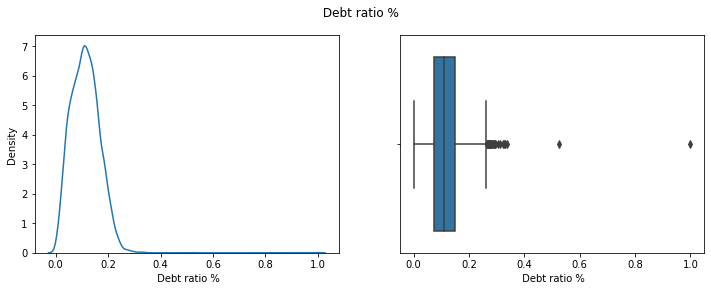

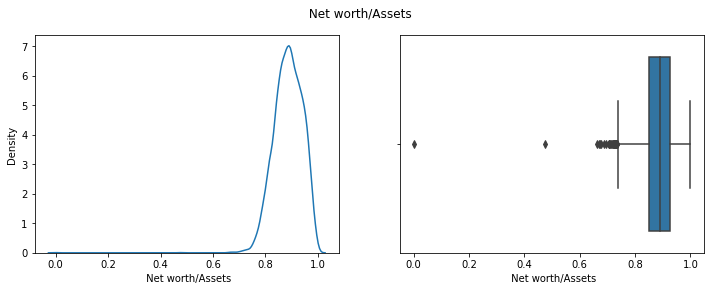

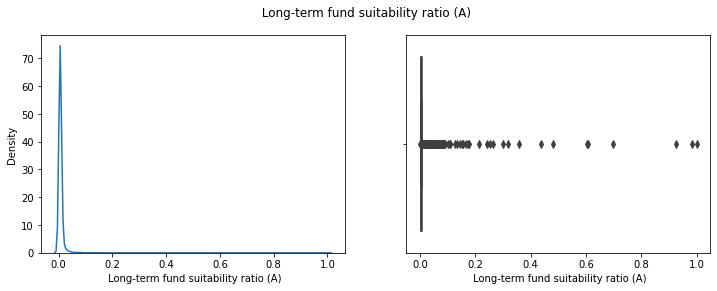

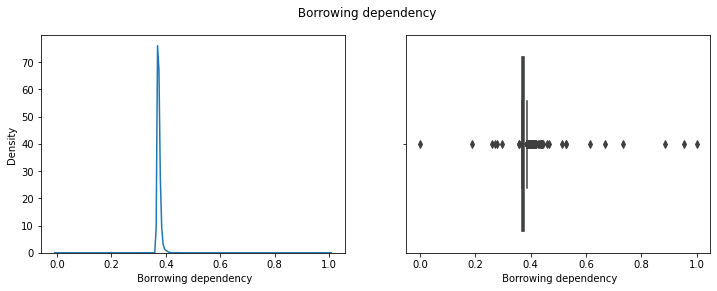

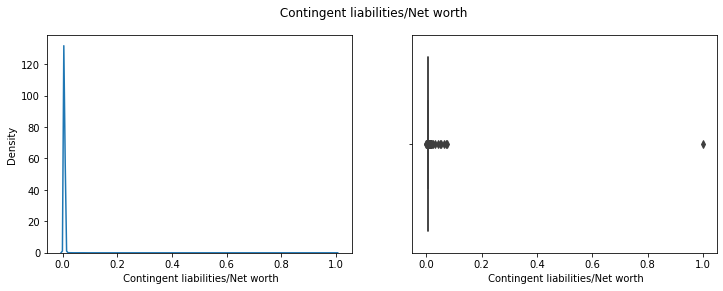

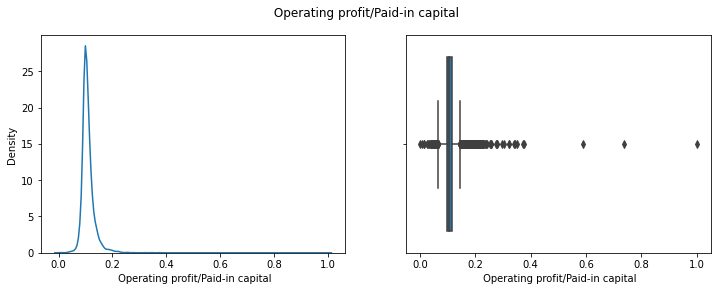

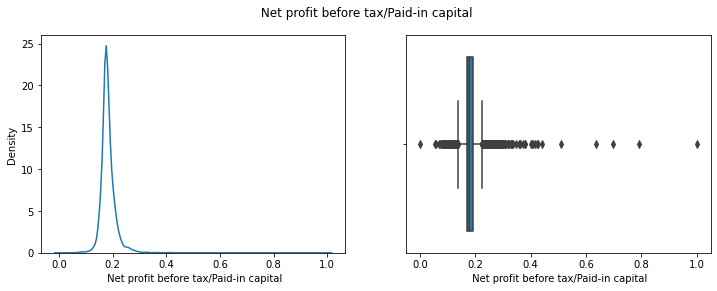

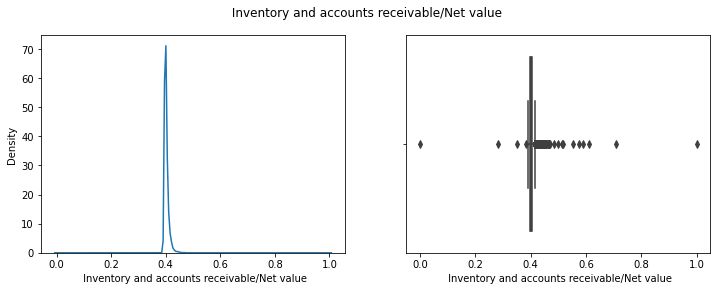

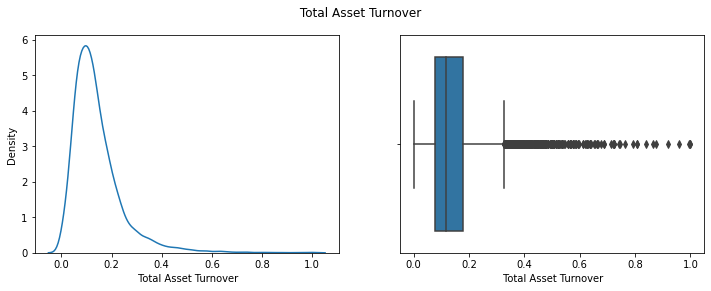

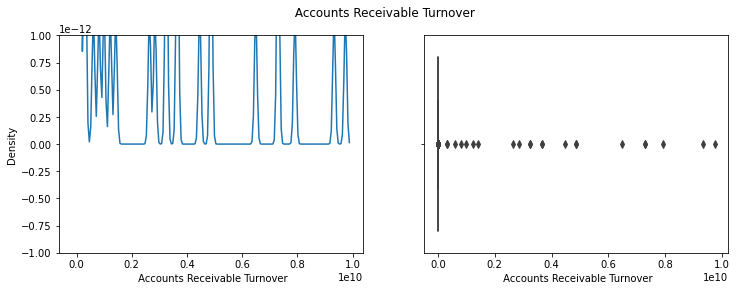

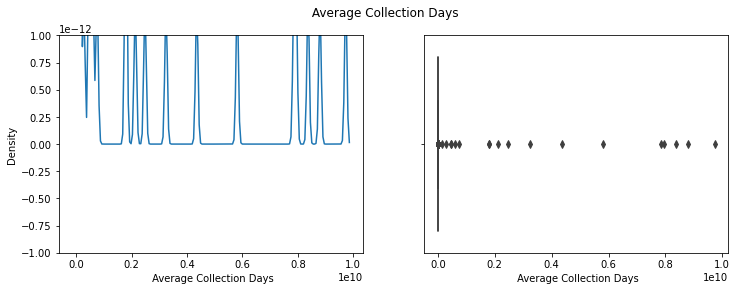

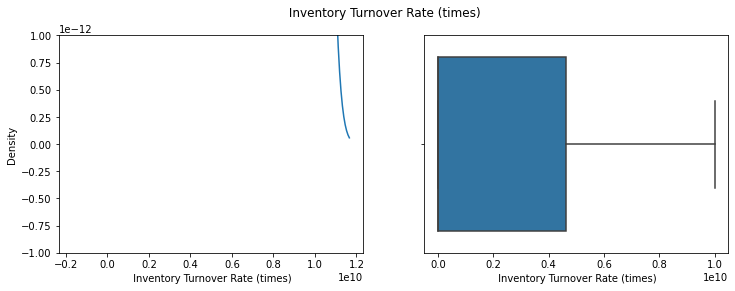

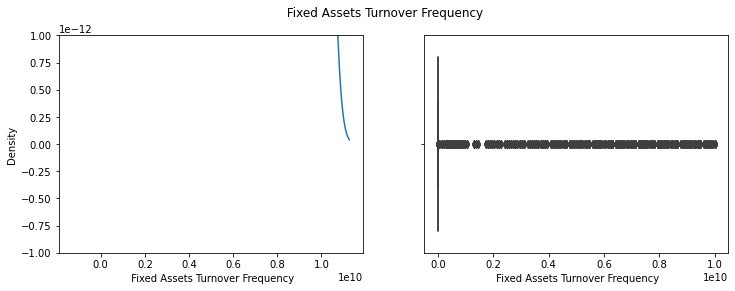

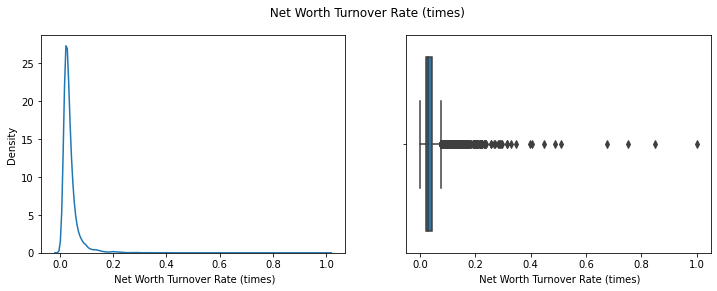

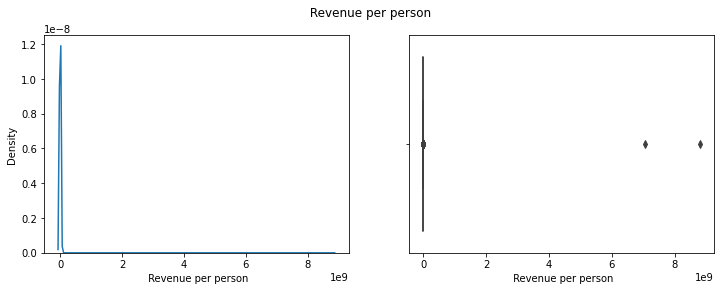

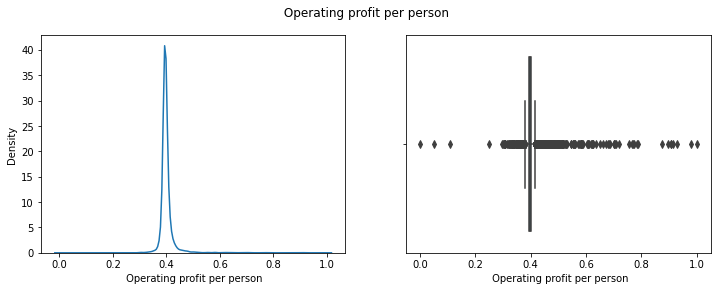

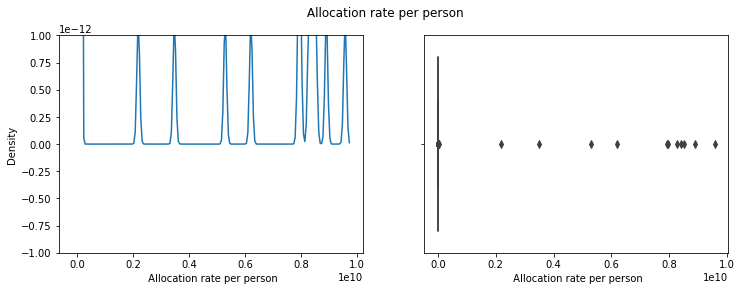

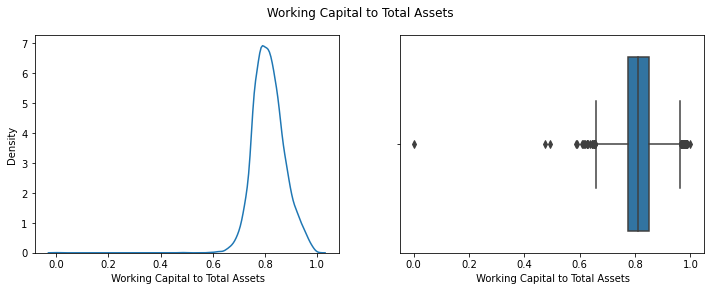

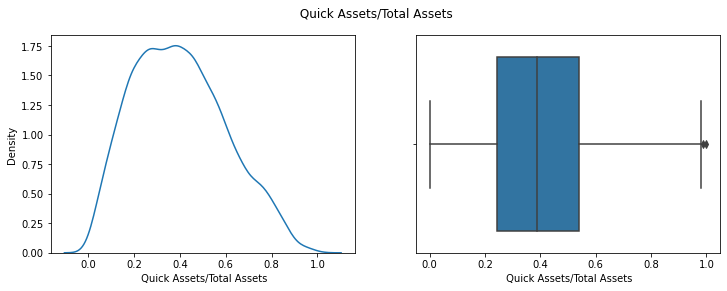

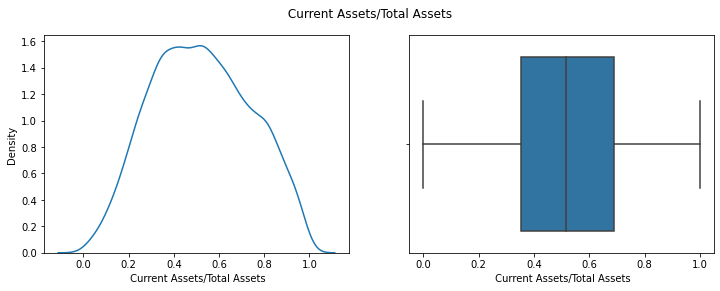

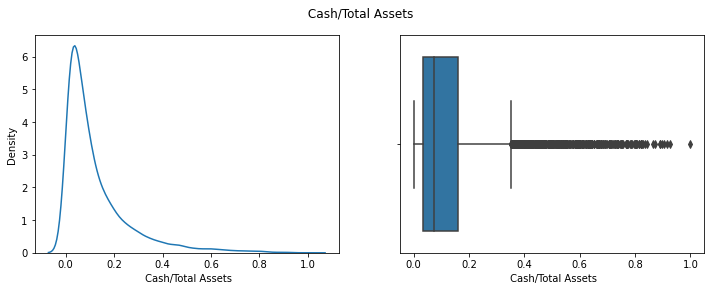

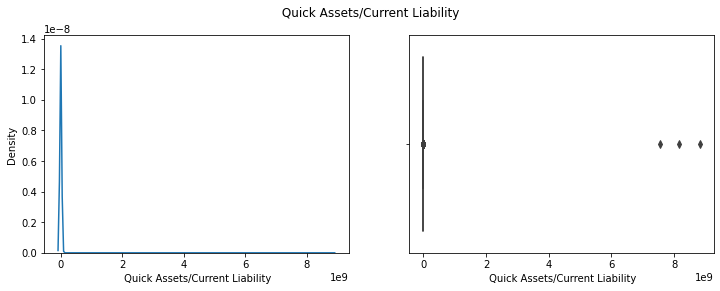

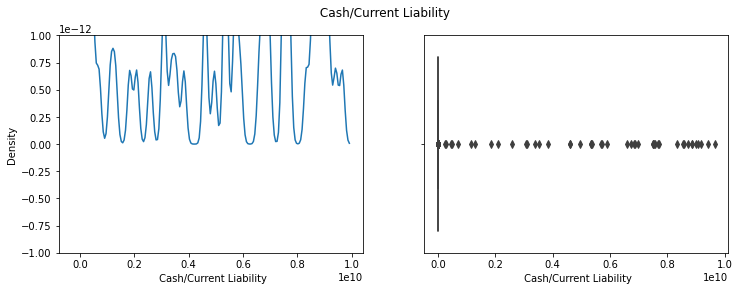

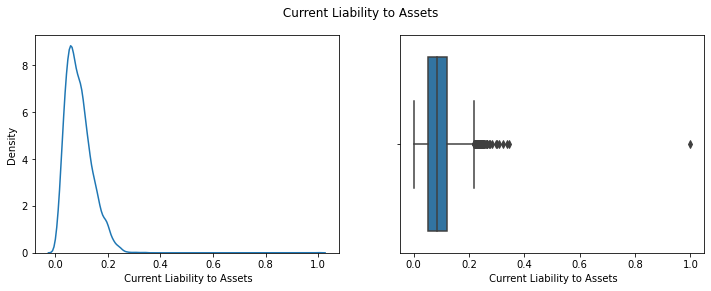

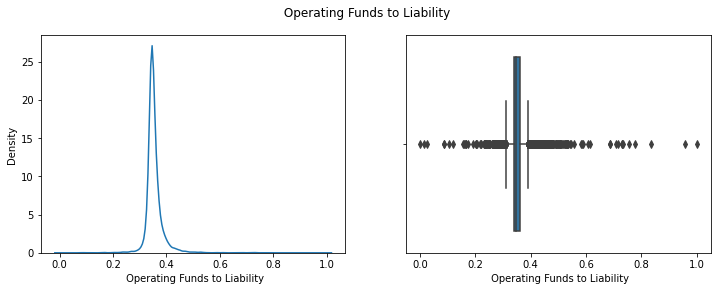

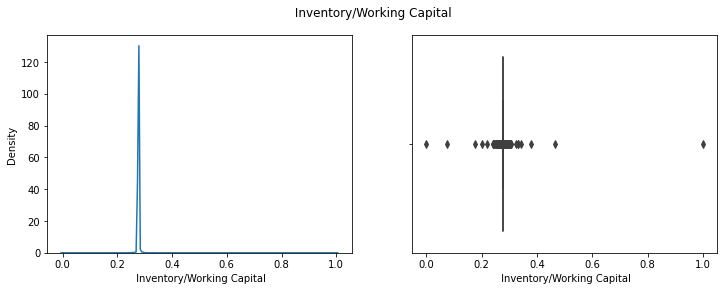

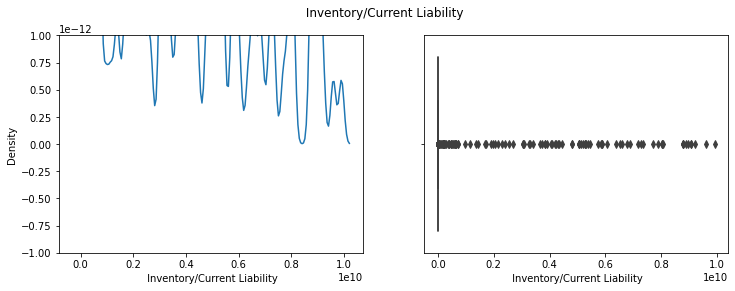

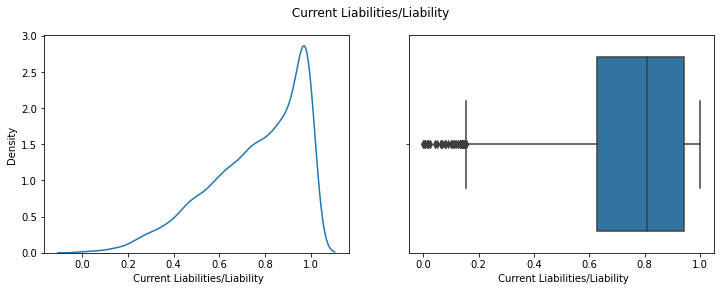

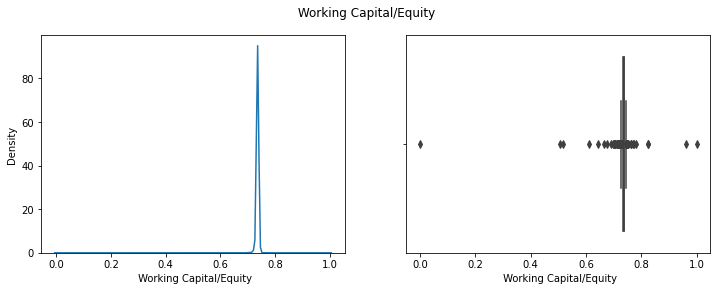

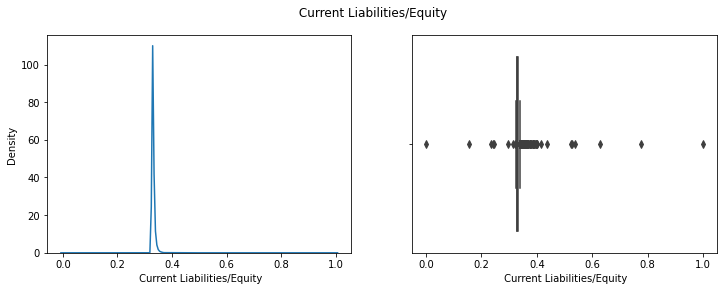

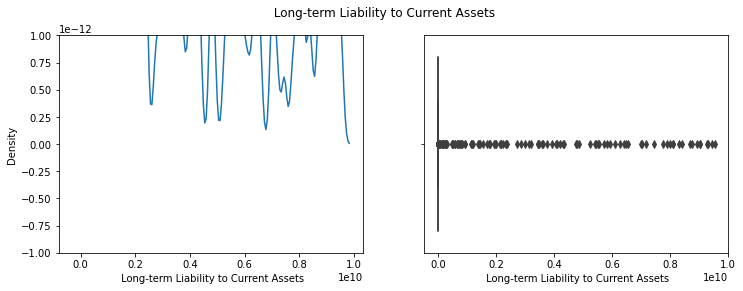

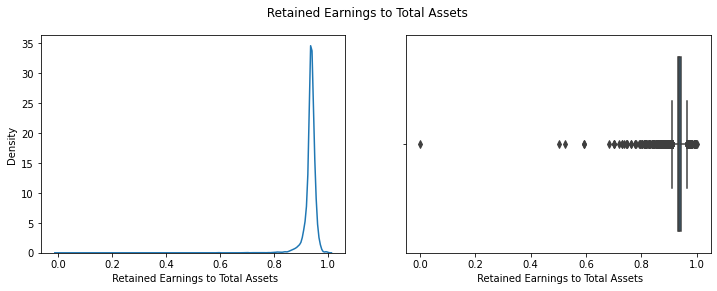

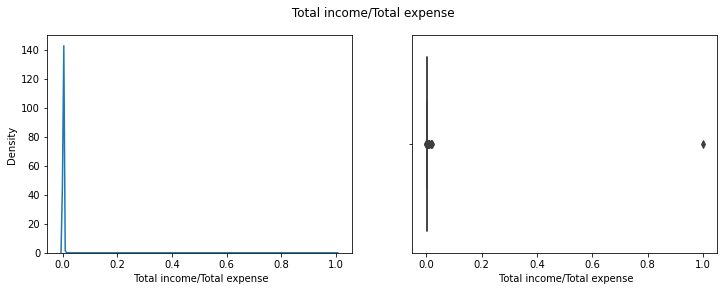

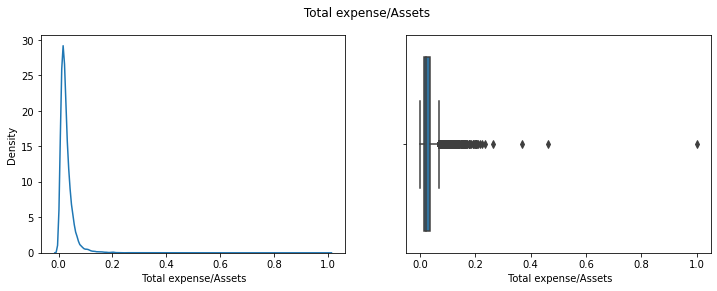

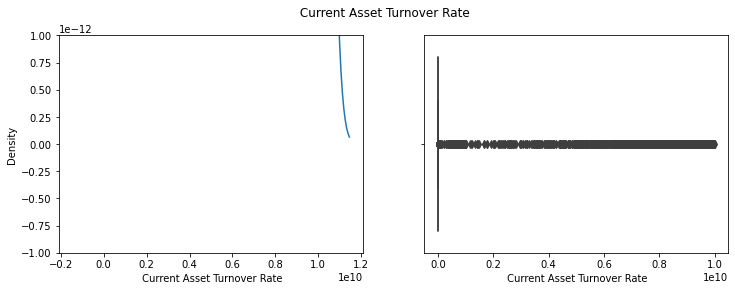

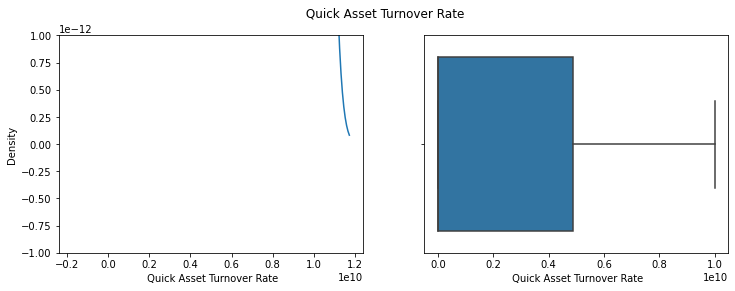

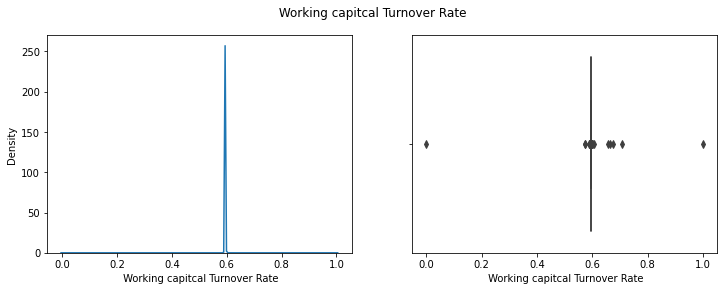

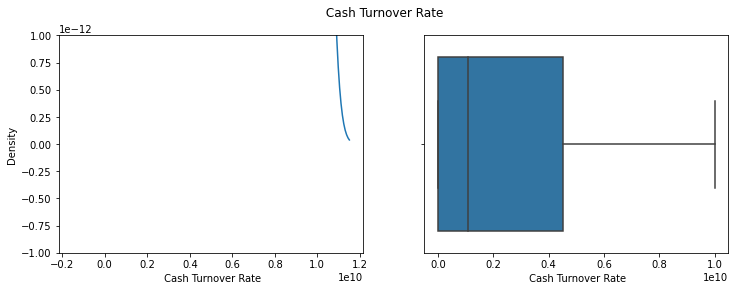

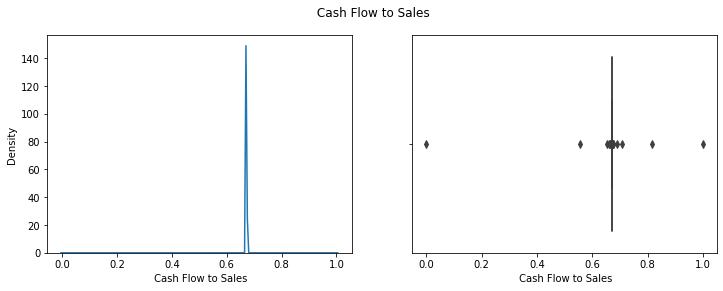

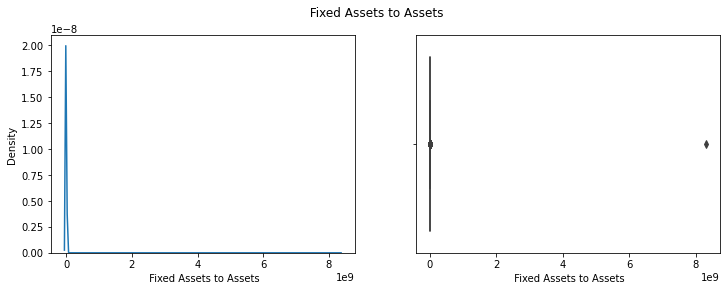

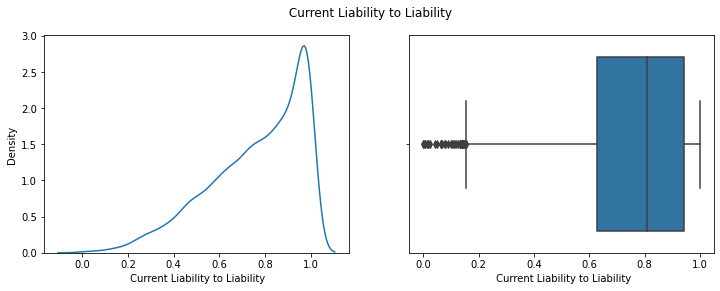

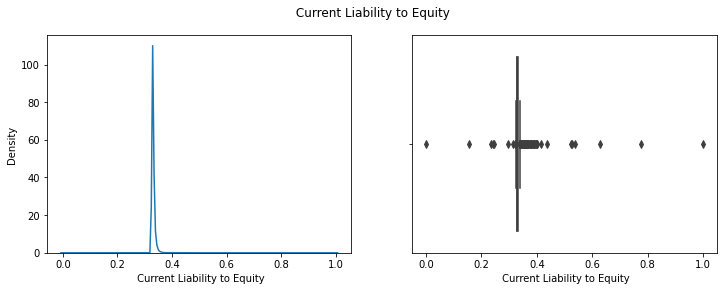

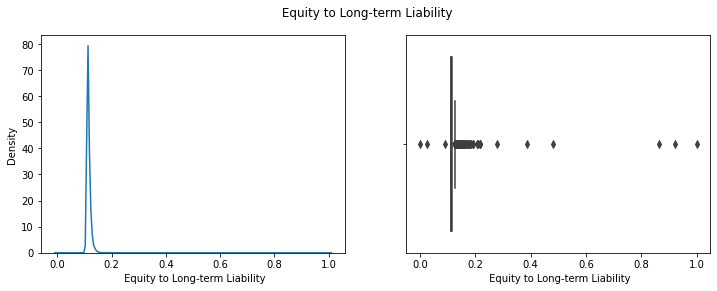

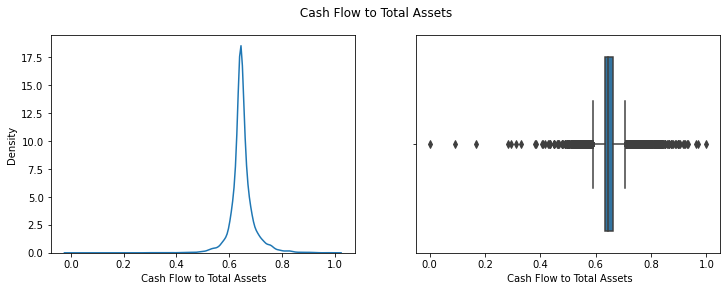

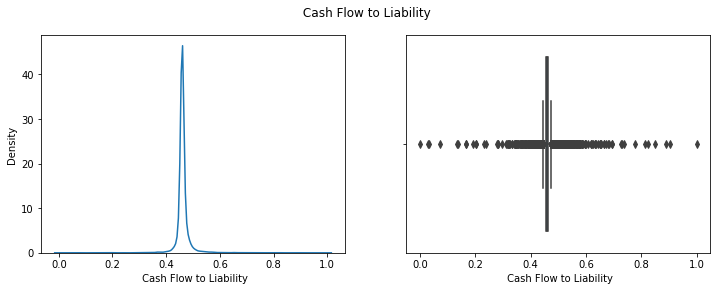

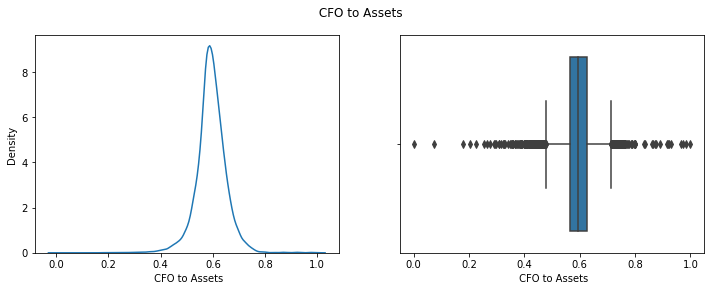

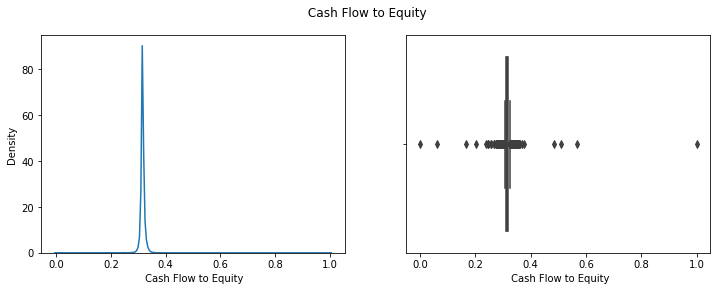

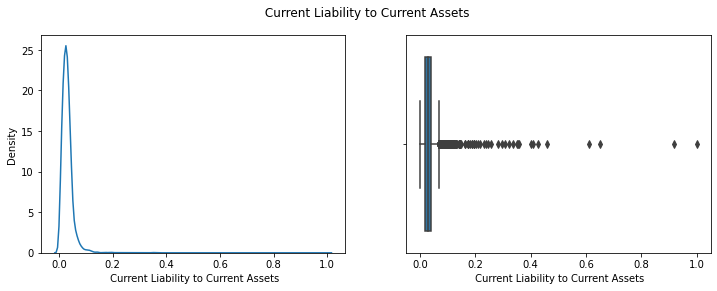

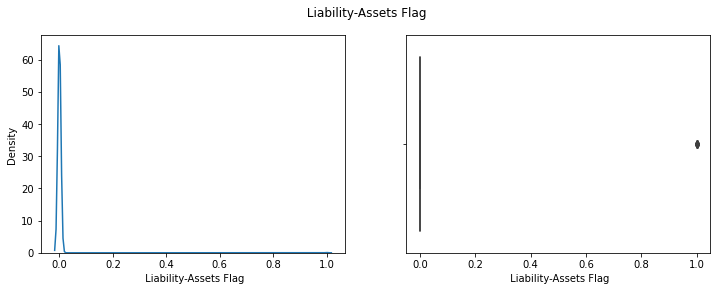

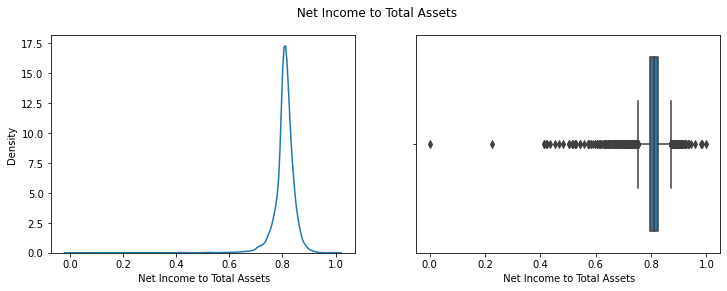

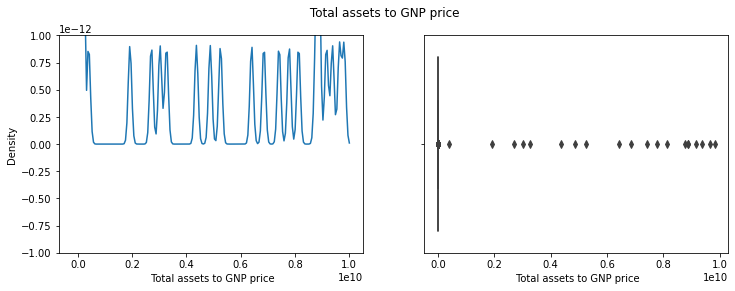

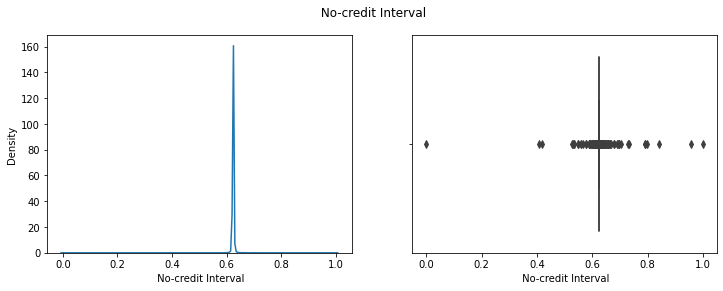

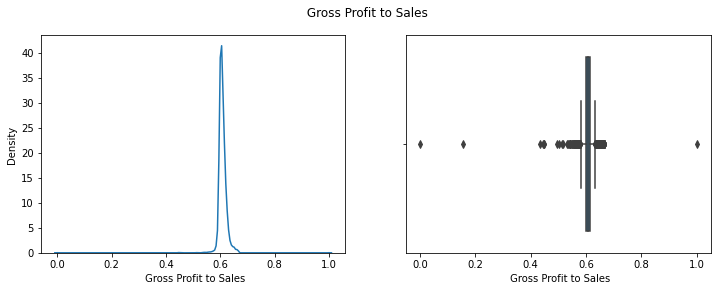

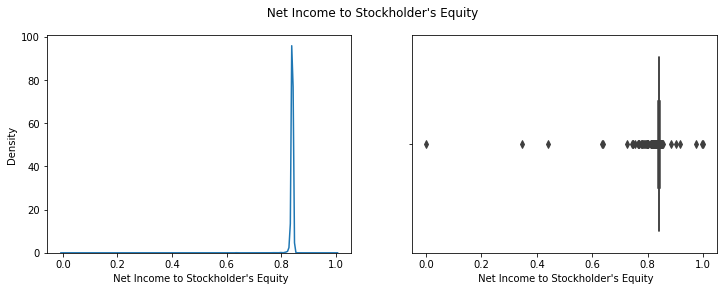

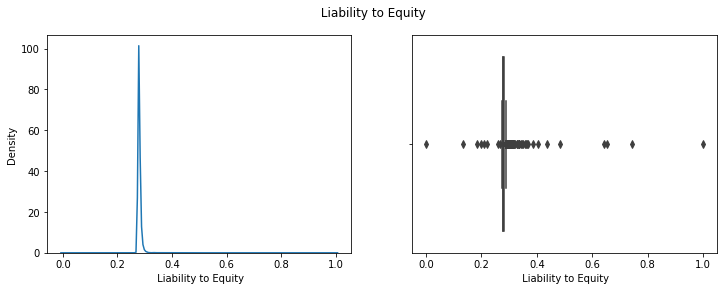

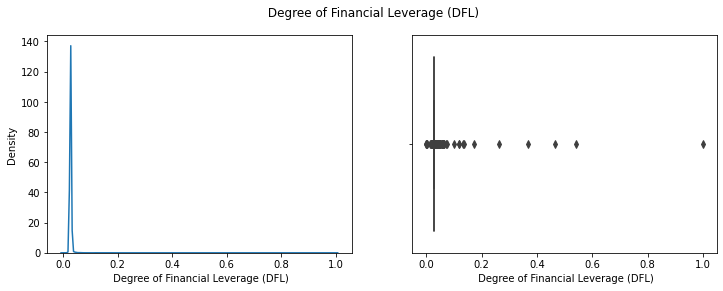

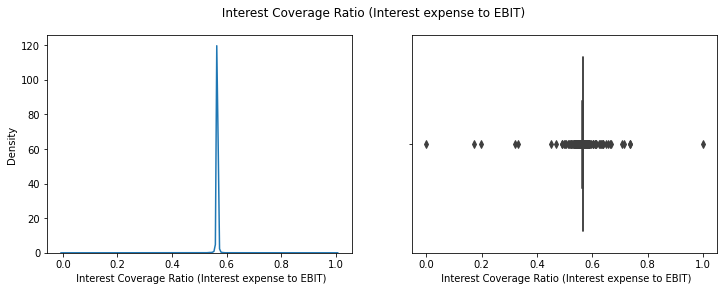

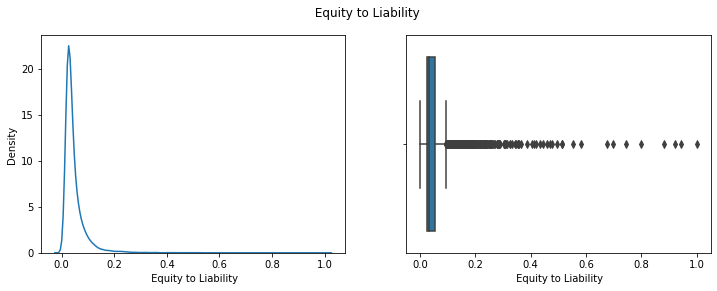

In [5]:
columns = data.columns.tolist()
for col in columns[0:]:
    f,axes = plt.subplots(1,2,figsize=(12,4))
    sns.kdeplot(x=data[col],ax=axes[0])
    sns.boxplot(x=data[col],ax=axes[1])
    f.suptitle(col)
    plt.show()

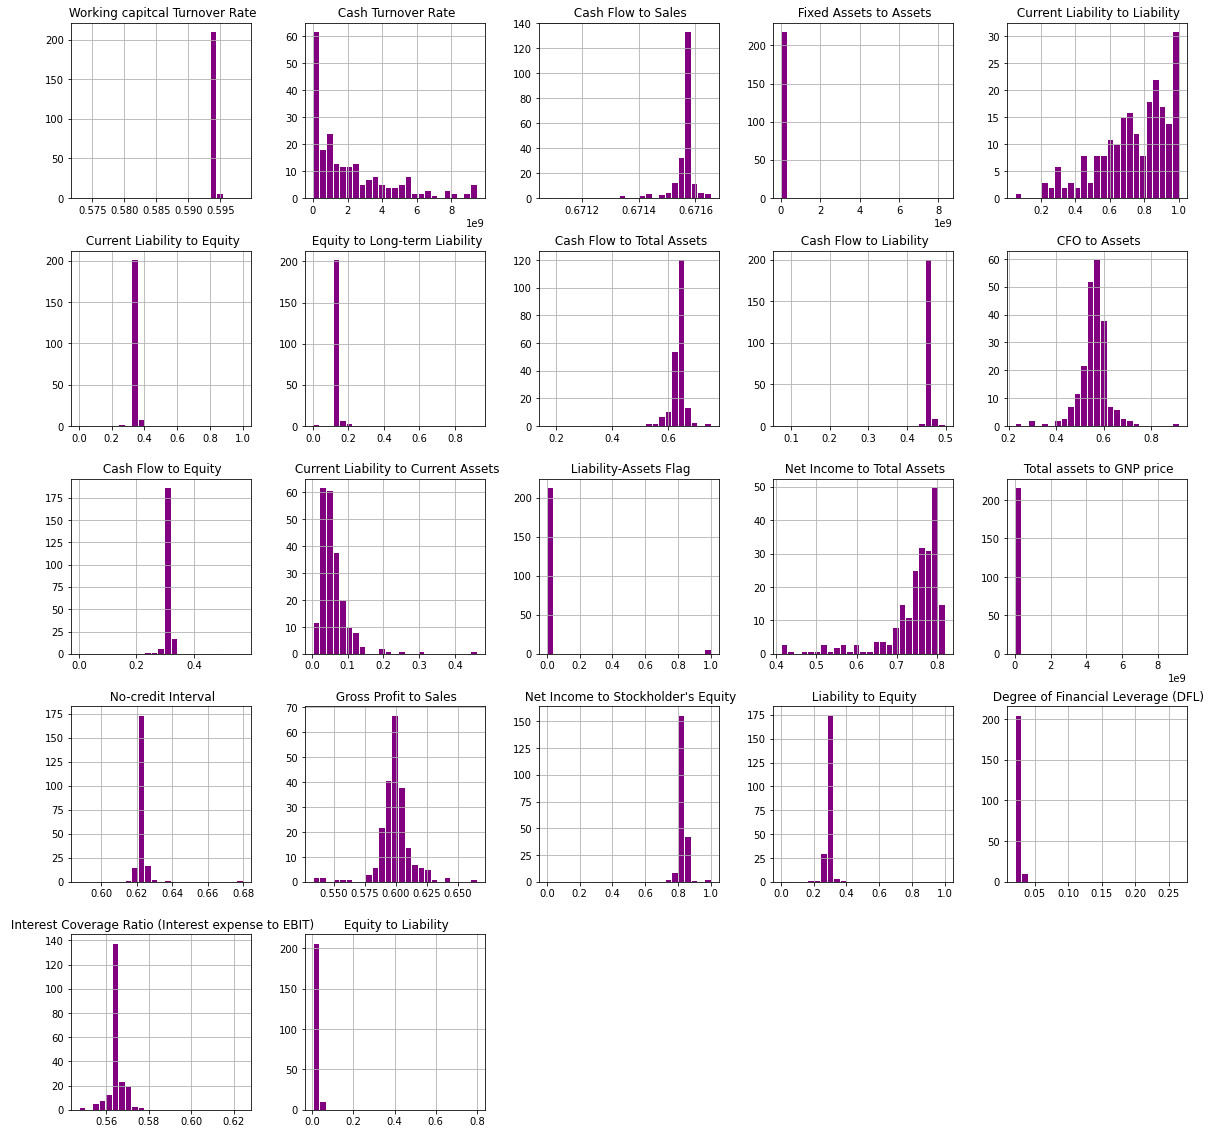

In [7]:
data[data['Bankrupt']==1].iloc[:,73:95].hist(figsize=(20,20), color='purple',edgecolor= 'white', bins = 25)
#[x.title.set_size(8) for x in fig.ravel()]
plt.show()

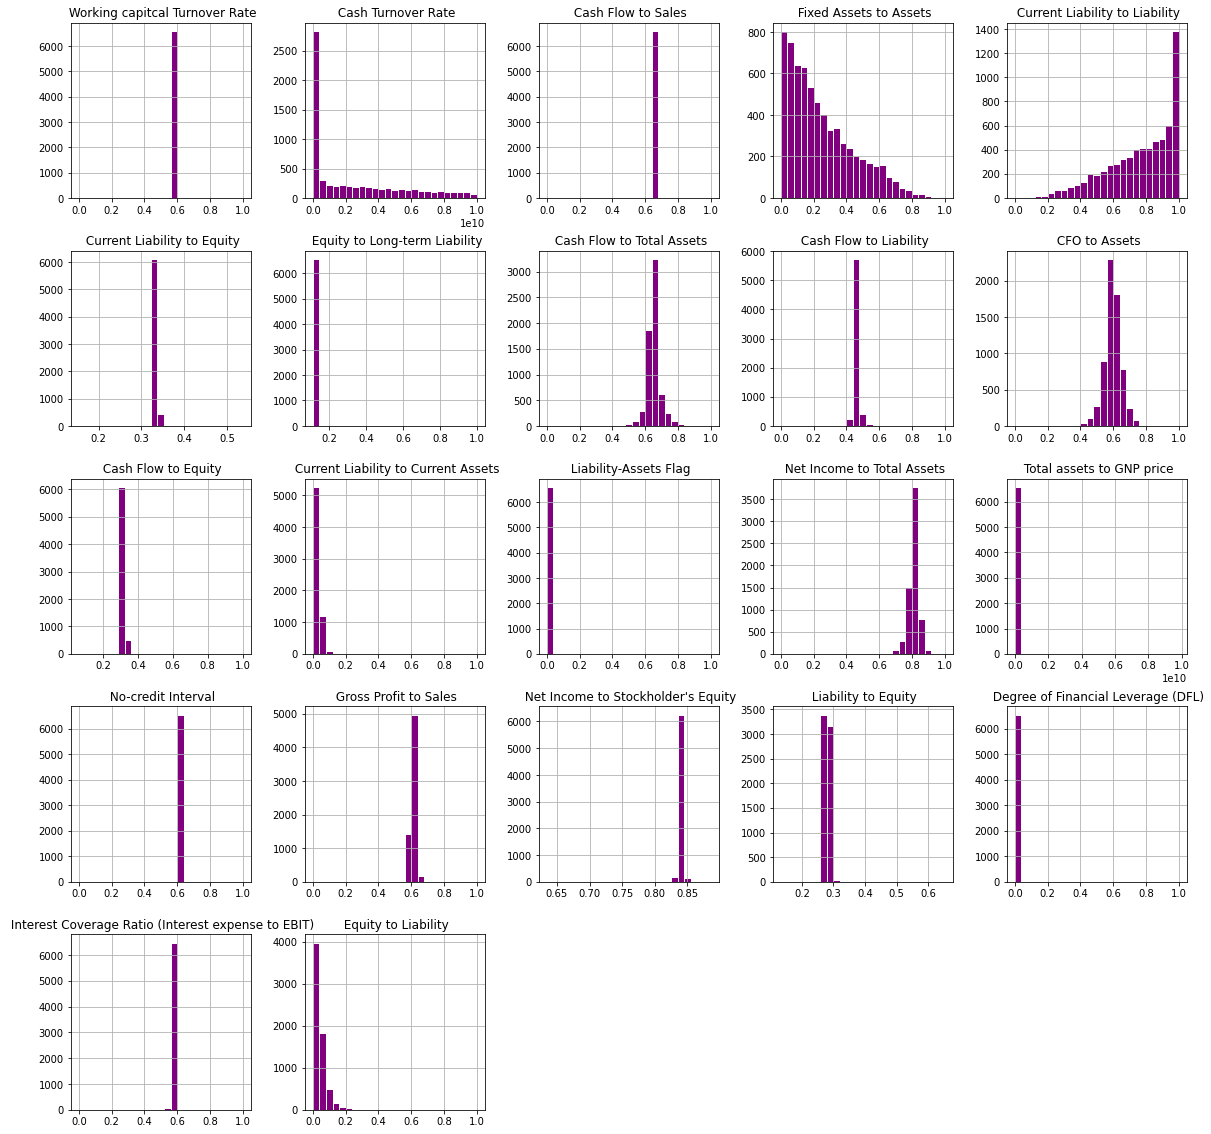

In [8]:
data[data['Bankrupt']==0].iloc[:,73:95].hist(figsize=(20,20), color='purple',edgecolor= 'white', bins = 25)
#[x.title.set_size(8) for x in fig.ravel()]
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

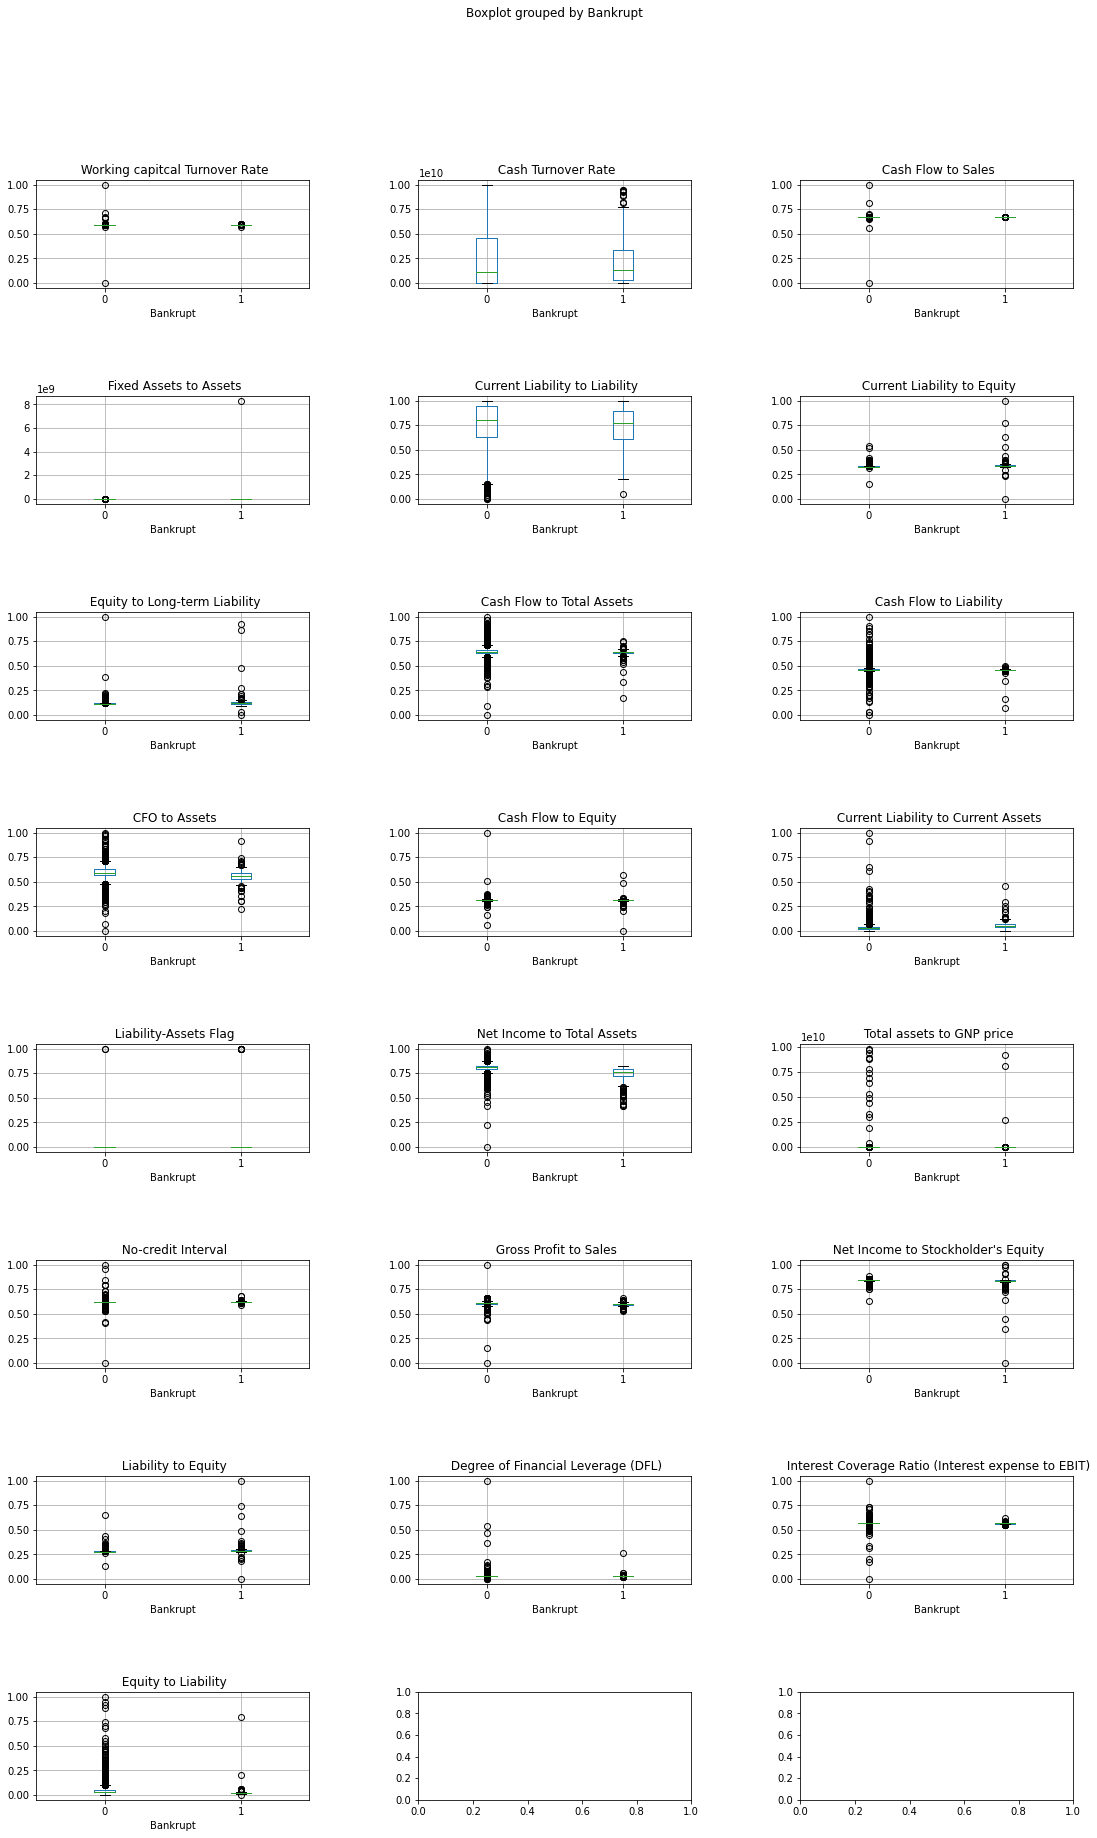

In [9]:
fig, axes = plt.subplots(8,3,figsize=(18,30)) # create figure and axes
for i,el in enumerate(list(data.columns.values)[73:95]):
    a = data.boxplot(el, by="Bankrupt", ax=axes.flatten()[i])
plt.subplots_adjust(hspace=1, wspace=0.4)
plt.show()

In [ ]:
data_new=(data-data.mean())/data.std() 
data_new['Bankrupt'] = data['Bankrupt']
data_new.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,-2.217747,-2.045648,-2.400185,-0.383306,-0.382610,0.016455,-0.023514,-0.020163,-0.087472,-0.031279,-0.616288,-0.750658,-0.545216,-0.15191,-0.829327,-1.279154,-1.275135,-1.276053,-1.793974,-0.671032,-0.025696,-0.471337,-1.375049,-0.025298,0.019995,-0.012030,-0.012261,-0.010298,-0.182246,-0.01372,-0.119110,-0.769240,-0.01211,-0.034234,-0.092514,-0.026224,1.750717,-1.750717,-0.133495,...,-1.155748,-1.520461,-0.861757,-0.020935,-0.072813,1.126184,-0.563710,-0.045368,-0.095879,-0.412865,-1.245242,0.568445,-0.094973,-1.232503,-0.043607,1.313931,-0.175409,1.299655,-0.019618,-0.685347,0.003947,-0.01211,-0.412865,0.568445,0.558387,-0.257012,-0.108210,-1.247139,-0.206579,2.812287,-0.034269,-2.254152,-0.049487,-0.084268,-0.383437,-0.861548,0.680121,-0.060026,-0.098971,-0.622022
1,1,-0.673779,-0.311045,-0.598406,0.135058,0.136297,0.014669,0.014798,0.015965,-0.005956,0.009823,-0.616288,-0.750658,-0.326608,-0.15191,-0.829327,-0.251859,-0.250410,-0.251531,-0.597335,-0.303511,-0.025696,-0.550018,-0.435280,-0.027128,0.010034,0.039470,0.039661,-0.001930,0.207716,-0.01372,0.027845,-0.143106,-0.01211,-0.034234,0.372066,-0.026224,1.075648,-1.075648,-0.132272,...,-1.350982,-1.558166,-0.783816,-0.020935,-0.072813,-0.670313,-0.361964,1.169801,-0.095879,-2.191878,-0.328929,-0.123788,-0.094973,-0.143464,-0.026738,-0.135116,-0.423888,1.640402,-0.010125,0.006133,0.004192,-0.01211,-2.191878,-0.123788,0.269927,-0.182187,-0.095122,-0.449343,-0.109503,0.527446,-0.034269,-0.309011,-0.049487,-0.021387,0.135243,-0.029802,0.240667,15.128707,0.364532,-0.535534
2,1,-1.303576,-0.908353,-1.319813,-0.383731,-0.388148,0.007857,-0.061107,-0.051179,-0.142227,-0.086560,-0.616288,-0.740843,-0.523060,-0.15191,-0.829327,-0.381848,-0.380075,0.090815,-1.450047,-0.930104,-0.025696,-0.599557,-1.252471,0.0291

In [ ]:
X = data_new.iloc[:,1:95]
Y = data_new.iloc[:,0]

In [ ]:
Y_new = map(str, Y) 
Y_obj = pd.DataFrame(Y_new,columns= ["Bankrupt"])
Y_obj.dtypes

Bankrupt    object
dtype: object

In [ ]:
print(Y[Y==1].shape[0], Y[Y==0].shape[0])

220 6599


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


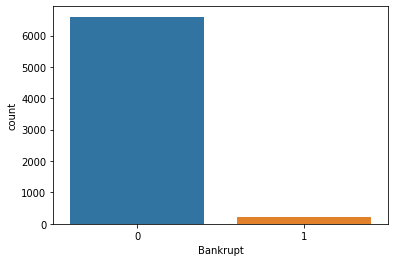

In [ ]:
g = sns.countplot(data['Bankrupt'])
g.set_xticklabels(['0','1'])
plt.show()

Bankrupt: 220, Not Bankrupt: 6599, hence the data is imbalanced.

In [ ]:
def ptbi(x):
    y = data.iloc[:,0]
    biser = stats.pointbiserialr(x, y)[0]
    return biser 

In [ ]:
corr = []
for i in range(1, 95):
  x = data_new.iloc[:,i]
  corr.append(ptbi(x))


In [ ]:
columns = list(X.columns)


In [ ]:
biser_df = pd.DataFrame(columns,columns= ["Features"])
biser_df["PBC"] = corr
biser_df["abs PBC"] = np.abs(corr)
biser_df

,Features,PBC,abs PBC
0,ROA(C) before interest and depreciation befor...,-0.260807,0.260807
1,ROA(A) before interest and % after tax,-0.282941,0.282941
2,ROA(B) before interest and depreciation after...,-0.273051,0.273051
3,Operating Gross Margin,-0.100043,0.100043
4,Realized Sales Gross Margin,-0.099445,0.099445
...,...,...,...
89,Net Income to Stockholder's Equity,-0.180987,0.180987
90,Liability to Equity,0.166812,0.166812
91,Degree of Financial Leverage (DFL),0.010508,0.010508
92,Interest Coverage Ratio (Interest expense to ...,-0.005509,0.005509


In [ ]:
biser_df.sort_values(by=['abs PBC'], ascending=False).head(20)

,Features,PBC,abs PBC
85,Net Income to Total Assets,-0.315457,0.315457
1,ROA(A) before interest and % after tax,-0.282941,0.282941
2,ROA(B) before interest and depreciation after...,-0.273051,0.273051
0,ROA(C) before interest and depreciation befor...,-0.260807,0.260807
36,Debt ratio %,0.250161,0.250161
37,Net worth/Assets,-0.250161,0.250161
18,Persistent EPS in the Last Four Seasons,-0.219560,0.219560
67,Retained Earnings to Total Assets,-0.217779,0.217779
42,Net profit before tax/Paid-in capital,-0.207857,0.207857
22,Per Share Net profit before tax (Yuan ¥),-0.201395,0.201395


In [ ]:
from sklearn.feature_selection import RFECV
selector = RFECV(estimator=RandomForestClassifier(),scoring='precision',step=4,cv=4)
selector = selector.fit(X_after_multicoll, Y)
selector.support_
selector.ranking_ 

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 3, 1, 1, 4,
       2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 4, 1, 3, 1, 1, 4, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
selector.ranking_.shape

(65,)

In [ ]:
selector.support_

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False, False,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True, False,  True,
       False,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
rfecv_df = pd.DataFrame(features_after_multicoll,columns= ["Features"])
rfecv_df["Ranking"] = selector.ranking_
rfecv_df

,Features,Ranking
0,ROA(C) before interest and depreciation befor...,1
1,Realized Sales Gross Margin,1
2,Pre-tax net Interest Rate,1
3,Non-industry income and expenditure/revenue,1
4,Operating Expense Rate,1
...,...,...
60,No-credit Interval,1
61,Net Income to Stockholder's Equity,1
62,Degree of Financial Leverage (DFL),1
63,Interest Coverage Ratio (Interest expense to ...,1


In [ ]:
rfecv_df.sort_values(by=['Ranking'], ascending=True).head(20)

,Features,Ranking
0,ROA(C) before interest and depreciation befor...,1
33,Net Worth Turnover Rate (times),1
35,Operating profit per person,1
37,Quick Assets/Total Assets,1
38,Cash/Total Assets,1
40,Cash/Current Liability,1
41,Inventory/Working Capital,1
42,Inventory/Current Liability,1
44,Retained Earnings to Total Assets,1
45,Total income/Total expense,1


In [ ]:
df_rfecv = pd.DataFrame(selector.support_,features_after_multicoll)
df_rfecv["Feature Number"] = np.arange(start=0, stop=65, step=1)
df_rfecv[df_rfecv.iloc[:,0] == True]

,0,Feature Number
ROA(C) before interest and depreciation before interest,True,0
Realized Sales Gross Margin,True,1
Pre-tax net Interest Rate,True,2
Non-industry income and expenditure/revenue,True,3
Operating Expense Rate,True,4
Research and development expense rate,True,5
Cash flow rate,True,6
Tax rate (A),True,8
Net Value Per Share (B),True,9
Cash Flow Per Share,True,10


In [ ]:
df_rfecv[df_rfecv.iloc[:,0] == True].shape

(53, 2)

Optimal number of features : 44


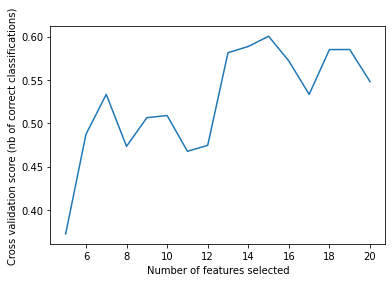

In [ ]:
from sklearn.model_selection import StratifiedKFold
# Create the RFE object and compute a cross-validated score.
rf = RandomForestClassifier()
# The "accuracy" scoring is proportional to the number of correct
# classifications

min_features_to_select = 5  # Minimum number of features to consider
rfecv = RFECV(estimator=rf, step=4, cv=StratifiedKFold(4),
              scoring='precision',
              min_features_to_select=min_features_to_select)
rfecv.fit(X_after_multicoll, Y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

Multicollinearity


In [ ]:
data_new.drop(data_new.columns[[0]], axis=1).corr()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,...,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
ROA(C) before interest and depreciation before interest,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,0.051328,0.066869,0.106461,0.323482,0.048882,0.250761,0.505580,0.505407,0.505281,0.775006,0.379839,-0.015932,0.687201,0.750564,0.000591,0.036511,0.115083,0.115040,0.025234,0.019635,-0.021930,0.079906,0.296158,0.013196,-0.026336,0.003988,-0.022208,-0.261427,0.261427,0.002967,-0.161671,...,0.181993,0.098820,0.235314,-0.010530,-0.046009,-0.210256,0.388151,-0.004447,0.013330,0.052783,0.103819,-0.142734,0.021508,0.650217,0.023450,-0.296019,0.005716,-0.027280,0.001824,-0.029477,0.011759,-0.009192,0.052783,-0.142734,-0.086535,0.262454,0.159699,0.504311,0.129002,-0.160725,-0.109272,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,0.052416
ROA(A) before interest and % after tax,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,0.049909,0.075727,0.084334,0.288440,0.050362,0.225897,0.531799,0.531790,0.531821,0.764828,0.326239,-0.011829,0.654253,0.752578,0.003277,0.042208,0.125384,0.125872,0.024887,0.026977,-0.063970,0.081982,0.263615,0.014102,-0.018412,0.005440,-0.010323,-0.259972,0.259972,0.020707,-0.161868,...,0.202017,0.157005,0.217918,-0.009612,-0.037468,-0.190501,0.351107,-0.000004,0.004864,0.080401,0.120403,-0.133816,0.022241,0.718013,0.028873,-0.357147,-0.000869,-0.025143,0.004491,-0.025817,0.012198,-0.005860,0.080401,-0.133816,-0.103015,0.263591,0.157065,0.443017,0.112929,-0.195673,-0.156890,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,0.057887
ROA(B) before interest and depreciation after tax,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,0.052261,0.065602,0.102147,0.323040,0.045839,0.197344,0.5020

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X_after_multicoll = calculate_vif_(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping ' Debt ratio %' at index: 36
dropping ' Working Capital to Total Assets' at index: 52
dropping ' Current Liabilities/Liability' at index: 61
dropping ' Current Liabilities/Equity' at index: 62
dropping ' Operating Profit Rate' at index: 5
dropping ' Operating Gross Margin' at index: 3
dropping ' Net Value Per Share (A)' at index: 14
dropping ' After-tax net Interest Rate' at index: 5
dropping ' Gross Profit to Sales' at index: 80
dropping ' Operating profit/Paid-in capital' at index: 36
dropping ' Net Value Per Share (C)' at index: 13
dropping ' Liability to Equity' at index: 79
dropping ' Continuous interest rate (after tax)' at index: 6
dropping ' After-tax Net Profit Growth Rate' at index: 19
dropping ' ROA(B) before interest and depreciation after tax' at index: 2
dropping ' Current Liability to Equity' at index: 64
dropping ' ROA(A) before interest and % after tax' at index: 1
dropping ' Current Liability to Assets' at index: 47
dropping ' Borrowing dependency' at index: 

In [ ]:
X_after_multicoll.shape

(6819, 65)

In [ ]:
X_after_multicoll.head()

,ROA(C) before interest and depreciation before interest,Realized Sales Gross Margin,Pre-tax net Interest Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Net worth/Assets,Long-term fund suitability ratio (A),Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Quick Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Working Capital,Inventory/Current Liability,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Current Liability to Liability,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,-2.217747,-0.382610,-0.023514,-0.087472,-0.616288,-0.750658,-0.545216,-0.15191,-0.829327,-1.279154,-0.671032,-0.025696,-0.471337,-0.025298,0.019995,-0.012261,-0.010298,-0.182246,-0.01372,-0.119110,-0.769240,-0.01211,-0.034234,-0.092514,-0.026224,-1.750717,-0.133495,0.041862,-0.332003,-0.045963,-0.03833,-0.661677,-0.407093,-0.155174,-0.017023,-0.237106,-0.038219,-1.155748,-0.861757,-0.020935,-0.072813,-0.045368,-0.095879,-0.094973,-1.232503,-0.043607,1.313931,-0.175409,1.299655,-0.019618,-0.685347,-0.01211,-0.412865,0.558387,-0.257012,-0.108210,-0.206579,2.812287,-0.034269,-0.049487,-0.084268,-0.861548,-0.060026,-0.098971,-0.622022
1,-0.673779,0.136297,0.014798,-0.005956,-0.616288,-0.750658,-0.326608,-0.15191,-0.829327,-0.251859,-0.303511,-0.025696,-0.550018,-0.027128,0.010034,0.039661,-0.001930,0.207716,-0.01372,0.027845,-0.143106,-0.01211,-0.034234,0.372066,-0.026224,-1.075648,-0.132272,-0.010932,-0.355330,-0.045963,-0.03833,2.220125,-0.116888,-0.357444,-0.017023,-0.277537,-0.038219,-1.350982,-0.783816,-0.020935,-0.072813,1.169801,-0.095879,-0.094973,-0.143464,-0.026738,-0.135116,-0.423888,1.640402,-0.010125,0.006133,-0.01211,-2.191878,0.269927,-0.182187,-0.095122,-0.109503,0.527446,-0.034269,-0.049487,-0.021387,-0.029802,15.128707,0.364532,-0.535534
2,-1.303576,-0.388148,-0.061107,-0.142227,-0.616288,-0.740843,-0.523060,-0.15191,-0.829327,-0.381848,-0.930104,-0.025696,-0.599557,0.029161,0.010604,0.022979,-0.003748,0.611482,-0.01372,-0.006595,-0.519056,-0.01211,-0.034234,-0.120975,-0.026224,-1.749595,-0.130815,0.048711,0.309299,-0.045963,-0.03833,-0.641665,0.662509,-0.687233,-0.017023,-0.571610,-0.038219,-0.296691,-0.884044,-0.020935,10.390576,0.005772,-0.095879,-0.094973,-0.971256,-0.040427,-0.287183,-0.423888,-0.641117,0.055315,-0.582238,-0.01211,-1.526884,0.116629,-0.147049,-0.086673,-0.082322,-0.199706,-0.034269,-0.049487,-0.005984,-0.249802,-0.062957,-0.125006,-0.621914
3,-1.735759,-1.441726,-0.017312,-0.024490,-0.616288,-0.750658,-0.101303,-0.15191,-0.829327,-1.092373,-0.102680,-0.025696,-1.121182,-0.029951,0.002370,-0.002910,-0.007038,-0.216756,-0.01372,-0.090961,0.212182,-0.01211,-0.034234,-0.067861,-0.026224,-0.710079,-0.13

In [ ]:
features_after_multicoll = list(X_after_multicoll.columns)

In [ ]:
X_final = X_after_multicoll.iloc[:,df_rfecv[df_rfecv.iloc[:,0] == True]["Feature Number"].values]
X_final.shape

(6819, 53)

In [ ]:
Y.shape

(6819,)

In [ ]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y, test_size = 0.3, random_state = 0)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, Y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

clf=RandomForestClassifier()

clf.fit(X_train_res,y_train_res)

y_pred=clf.predict(X_test)
print("Oversampled Data")
print(classification_report(Y_test, y_pred))

Oversampled Data
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1987
           1       0.30      0.41      0.35        59

    accuracy                           0.96      2046
   macro avg       0.64      0.69      0.66      2046
weighted avg       0.96      0.96      0.96      2046



In [ ]:
clf.fit(X_train,Y_train)

y_pred1=clf.predict(X_test)
print("Imbalanced Data")
print(classification_report(Y_test, y_pred1))

Imbalanced Data
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1987
           1       0.57      0.14      0.22        59

    accuracy                           0.97      2046
   macro avg       0.77      0.57      0.60      2046
weighted avg       0.96      0.97      0.96      2046



In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


Before OverSampling, counts of label '1': 161
Before OverSampling, counts of label '0': 4612 

After OverSampling, the shape of train_X: (9224, 53)
After OverSampling, the shape of train_y: (9224,) 

After OverSampling, counts of label '1': 4612
After OverSampling, counts of label '0': 4612


In [ ]:
print("Before Undersampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(Y_train == 0)))
  
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
X_train_miss, y_train_miss = nr.fit_sample(X_train, Y_train.ravel())
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 161
Before Undersampling, counts of label '0': 4612 

After Undersampling, the shape of train_X: (322, 53)
After Undersampling, the shape of train_y: (322,) 

After Undersampling, counts of label '1': 161
After Undersampling, counts of label '0': 161


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
clf.fit(X_train_miss,y_train_miss)

y_pred_=clf.predict(X_test)
print("Undersampled Data")
print(classification_report(Y_test, y_pred_))

Undersampled Data
              precision    recall  f1-score   support

           0       1.00      0.72      0.84      1987
           1       0.09      0.93      0.17        59

    accuracy                           0.73      2046
   macro avg       0.54      0.83      0.50      2046
weighted avg       0.97      0.73      0.82      2046



In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix for SMOTE")
confusion_matrix(Y_test, y_pred)

Confusion matrix for SMOTE


array([[1425,  562],
       [   6,   53]])

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix for Near Miss")
confusion_matrix(Y_test, y_pred_)

Confusion matrix for Near Miss


array([[1437,  550],
       [   4,   55]])